In [1]:
import os
import pandas as pd
from collections import Counter
import journal_tuning_process as jour
from IPython.display import display
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)
import journal_tuning_process as jour

In [2]:
df = pd.read_csv('new_tuned_references.csv')
df['raw_refer'] = list(pd.read_csv('extended_references.csv')['refer'].values)
df.to_csv('new_tuned_references.csv',index=False)

In [3]:
df.columns , df.shape

(Index(['paper_name_infor', 'institution_infor', 'author_infor',
        'journal_infor', 'dont_know_infor', 'page_infor', 'year_infor',
        'field_infor', 'cited_infor', 'char_refer', 'degree_refer',
        'journal_refer', 'name_refer', 'paper_refer', 'school_refer',
        'year_refer', 'raw_refer', 'page_count_infor'],
       dtype='object'), (37247, 18))

In [4]:
df.tail()

,paper_name_infor,institution_infor,author_infor,journal_infor,dont_know_infor,page_infor,year_infor,field_infor,cited_infor,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer,page_count_infor
37242,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008,경영학,피인용횟수 : 20,[기타자료],NaN,"Working paper, Harvard University,","Villalonga, Belen",Does Diversification Cause the “Diversificatio...,NaN,1999.0,"40. [기타자료] - Villalonga, Belen / 1999 / Does D...",39
37243,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,"Journal of Finance 59 : 479 ~ 506,","Villalonga, Belen",Diversification discount or premium? New Evide...,NaN,2004.0,"41. [학술지(정기간행물)] - Villalonga, Belen / 2004 / ...",39
37244,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,"Financial Management 33 : 5 ~ 27,","Villalonga, Belen",Does Diversification Cause the Diversification...,NaN,2004.0,"42. [학술지(정기간행물)] - Villalonga, Belen / 2004 / ...",39
37245,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,"St. John’s Review 44 : 66 ~ 80,","Weston, J. F",The Nature and Significance of Conglomerate Firms,NaN,1970.0,"43. [학술지(정기간행물)] - Weston, J. F / 1970 / The N...",39
37246,"Corporate Diversification, Relatedness, and Fi...",한국증권학회,"배성철 , 권택호 , 이장우",Asia-Pacific Journal of Financial Studies,37(6),pp.1025~1064,2008,경영학,피인용횟수 : 20,[학술지(정기간행물)],NaN,Journal of Finance 56 : 1667 ~ 1691,"Whited, Toni M",Is It Inefficient Investment That Causes the D...,NaN,2001.0,"44. [학술지(정기간행물)] - Whited, Toni M / 2001 / Is ...",39


In [26]:
refer_col = [i for i in df.columns if 'refer' in i]
infor_col = [i for i in df.columns if 'infor' in i]

In [28]:
set(df['char_refer'])

{'[단행본]', nan, '[학술지(정기간행물)]', '[학술대회논문]', '[기타자료]', '[보고서]', '[학위논문]'}

In [33]:
df[df['char_refer'] == '[학술지(정기간행물)]'][refer_col].tail()

,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer
37241,[학술지(정기간행물)],NaN,"Journal of Financial Economics 26 : 3 ~ 27,","Stulz, Ren?M",Managerial Direction and Optimal Financing Pol...,NaN,1990.0,"39. [학술지(정기간행물)] - Stulz, Ren?M / 1990 / Manag..."
37243,[학술지(정기간행물)],NaN,"Journal of Finance 59 : 479 ~ 506,","Villalonga, Belen",Diversification discount or premium? New Evide...,NaN,2004.0,"41. [학술지(정기간행물)] - Villalonga, Belen / 2004 / ..."
37244,[학술지(정기간행물)],NaN,"Financial Management 33 : 5 ~ 27,","Villalonga, Belen",Does Diversification Cause the Diversification...,NaN,2004.0,"42. [학술지(정기간행물)] - Villalonga, Belen / 2004 / ..."
37245,[학술지(정기간행물)],NaN,"St. John’s Review 44 : 66 ~ 80,","Weston, J. F",The Nature and Significance of Conglomerate Firms,NaN,1970.0,"43. [학술지(정기간행물)] - Weston, J. F / 1970 / The N..."
37246,[학술지(정기간행물)],NaN,Journal of Finance 56 : 1667 ~ 1691,"Whited, Toni M",Is It Inefficient Investment That Causes the D...,NaN,2001.0,"44. [학술지(정기간행물)] - Whited, Toni M / 2001 / Is ..."


degree , school 제외 전부 있어야 한다.

In [34]:
df[df['char_refer'] == '[학술대회논문]'][refer_col].tail()

,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer
36747,[학술대회논문],NaN,Proceedings of the 37th Annual Hawaii Internat...,"Bardhan, I",A real options approach for prioritization of ...,NaN,2004.0,"3. [학술대회논문] - Bardhan, I / 2004 / A real optio..."
36768,[학술대회논문],NaN,presented at the 5th annual conference on real...,"Gamba, A",A Log-transformed binomial lattice extension f...,NaN,2001.0,"24. [학술대회논문] - Gamba, A / 2001 / A Log-transfo..."
36914,[학술대회논문],NaN,"Corporate Governance on the Bond Spreads,Proce...",신현한,"pp.89-122.(Translated in English)Shin,Hyun-Han...",NaN,2004.0,4. [학술대회논문] - 신현한 / 2004 / pp.89-122.(Translat...
36916,[학술대회논문],NaN,"2004년도 한국회계학회 하계학술발표대회,",이세용,우리나라의 기업지배구조와 기업가치 사이의 관계에 대한 연구,NaN,2004.0,6. [학술대회논문] - 이세용 / 2004 / 우리나라의 기업지배구조와 기업가치 ...
36917,[학술대회논문],NaN,"2005년도 한국회계학회 하계학술발표대회,",이화진,기업지배구조가 보고이익의 질과 경영성과에 미치는 영향,NaN,2005.0,7. [학술대회논문] - 이화진 / 2005 / 기업지배구조가 보고이익의 질과 경영...


degree , school 제외 다 있어야 한다.

In [35]:
df[df['char_refer'] == '[단행본]'][refer_col].tail()

,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer
37179,[단행본],NaN,"Harcourt Brace,","Keynes, J. M",The general theory of employment. In: Interest...,NaN,1936.0,"29. [단행본] - Keynes, J. M / 1936 / The general ..."
37198,[단행본],NaN,"Prentice-Hall,","Scholes, M. S",Taxes and Business Strategy: a Planning Approach,NaN,2002.0,"48. [단행본] - Scholes, M. S / 2002 / Taxes and B..."
37210,[단행본],NaN,"Harvard University Press,","Caves, Richard E",Competition in the Open Economy: A Model Appli...,NaN,1980.0,"8. [단행본] - Caves, Richard E / 1980 / Competiti..."
37221,[단행본],NaN,"Prentice-Hall,","Greene, William H","Econometric analysis, 4th edition",NaN,2000.0,"19. [단행본] - Greene, William H / 2000 / Econome..."
37238,[단행본],NaN,"Harvard University Press,","Rumelt, Richard P","Strategy, Structure and Economic Performance",NaN,1974.0,"36. [단행본] - Rumelt, Richard P / 1974 / Strateg..."


degree , shcool

In [37]:
df[df['char_refer'] == '[기타자료]'][refer_col].tail()

,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer
37155,[기타자료],NaN,NaN,"Barclay, M. J",On the debt capacity of growth options. Unpubl...,NaN,2001.0,"5. [기타자료] - Barclay, M. J / 2001 / On the debt..."
37180,[기타자료],NaN,NaN,"Khanna, T","Emerging market business groups, foreign inves...",NaN,1999.0,"30. [기타자료] - Khanna, T / 1999 / Emerging marke..."
37196,[기타자료],NaN,"Working paper, University of California, Berke...","Ross, M. P","Corporate hedging: What, why and how?",NaN,1997.0,"46. [기타자료] - Ross, M. P / 1997 / Corporate hed..."
37211,[기타자료],NaN,NaN,"Chandler, A. D","The Visible Hand, Belknap Press, Cambridge, MA...",NaN,1977.0,"9. [기타자료] - Chandler, A. D / 1977 / The Visibl..."
37242,[기타자료],NaN,"Working paper, Harvard University,","Villalonga, Belen",Does Diversification Cause the “Diversificatio...,NaN,1999.0,"40. [기타자료] - Villalonga, Belen / 1999 / Does D..."


In [17]:
df[df['char_refer'] == '[기타자료]']

,paper_name_infor,institution_infor,author_infor,journal_infor,dont_know_infor,page_infor,year_infor,field_infor,cited_infor,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer,page_count_infor
14,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"EFA 2008 Athens Meetings Paper,","Hardouvelis, Gikas","Accruals, Net Stock Issues and Value-Glamour A...",NaN,2008.0,"15. [기타자료] - Hardouvelis, Gikas / 2008 / Accru...",28
16,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"Working Paper, Ohio State University,",Hirshleifer,The Accrual Anomaly: Risk or Mispricing?,NaN,2006.0,17. [기타자료] - Hirshleifer / 2006 / The Accrual ...,28
18,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"Working Paper, MIT,","Khan, Mozaffar",Are Accruals Really Mispriced? Evidence from T...,NaN,2005.0,"19. [기타자료] - Khan, Mozaffar / 2005 / Are Accru...",28
21,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"Working Paper, Wharton School,","Ng, Jeffrey",Distress Risk Information in Accruals,NaN,2004.0,"22. [기타자료] - Ng, Jeffrey / 2004 / Distress Ris...",28
27,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"Working Paper, Washington University,","Zach, Tzachi",Evaluating the ‘Accrual-fixation’ Hypothesis a...,NaN,2004.0,"28. [기타자료] - Zach, Tzachi / 2004 / Evaluating ...",28
28,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"Working Paper, Yale School of Management,","Zhang, Frank X.","Accruals, Investment, and the Accrual Anomaly",NaN,2006.0,"29. [기타자료] - Zhang, Frank X. / 2006 / Accruals...",28
29,발생액 이상현상과 차익거래기회에 관한 연구,한국증권학회,"고봉찬 , 김진우",한국증권학회지,38(1),pp.77~105,2009,경영학,피인용횟수 : 13,[기타자료],NaN,"Working Paper, Ohio State University","Zhang, Yinglei",Net Operating Assets as Predictor of Future St...,NaN,2005.0,"30. [기타자료] - Zhang, Yinglei / 2005 / Net Opera...",28
31,신용평가등급과 발생액 및 보수주의 이익 인식과의 관련성에 대한 실증적 연구,한국증권학회,김병호,한국증권학회지,38(3),pp.371~391,2009,경영학,피인용횟수 : 15,[기타자료],NaN,"Unpublished Paper, University of Texas,",Ali A,Proximity to Credit Rating Change and Earnings...,NaN,2008.0,2. [기타자료] - Ali A / 2008 / Proximity to Credit...,20
62,프로그램매매 중단장치가 주식시장의 정보비대칭에 미치는 영향,한국증권학회,"박종원 , 이우백 , 권택호",한국증권학회지,38(3),pp.325~369,2009,경영학,피인용횟수 : 7,[기타자료],NaN,"Working Paper,","Battacharya, N",Earnings Quality and Information Asymmetry: Ev...,NaN,2006.0,"14. [기타자료] - Battacharya, N / 2006 / Earnings ...",44
66,프로그램매매 중단장치가 주식시장의 정보비대칭에 미치는 영향,한국증권학회,"박종원 , 이우백 , 권택호",한국증권학회지,38(3),pp.325~369,2009,경영학,피인용횟수 : 7,[기타자료],NaN,"NBER Working Paper,","Cao, Charles",The Informational Content of an Open Limit Ord...,NaN,2006.0,"18. [기타자료] - Cao, Charles / 2006 / The Informa...",44


In [25]:
df[df['char_refer'] == '[기타자료]'].reset_index().iloc[19,]['raw_refer']

'18. [기타자료] - Ziemba, W / 1999 / Worldwide Asset and Liability Modeling Cambridge Univ., Press,'

working paper , discussion paper , unpublished -- 대소문자 구분없이

In [38]:
df[df['char_refer'] == '[학위논문]'][refer_col].tail()

,char_refer,degree_refer,journal_refer,name_refer,paper_refer,school_refer,year_refer,raw_refer
32452,[학위논문],NaN,"국민대학교대학원,",이송우,민영건강보험의 도덕적 해이와 본인부담금의 도입효과에 관한 연구,NaN,2011.0,8. [학위논문] - 이송우 / 2011 / 민영건강보험의 도덕적 해이와 본인부담금...
32453,[학위논문],석사,NaN,이수진,민간의료보험이 의료수요에 미치는 영향 : 도덕적 해이와 역선택 효과의 실증적 구분,"연세대학교 대학원,",2012.0,9. [학위논문] - 이수진 / 2012 / 민간의료보험이 의료수요에 미치는 영향 ...
32878,[학위논문],박사,NaN,한영하,한국주택금융공사 보금자리론 조기상환율 추정 및 가치산정 연구,"연세대학교 대학원,",2014.0,7. [학위논문] - 한영하 / 2014 / 한국주택금융공사 보금자리론 조기상환율 ...
36364,[학위논문],박사,NaN,"Low, A",Essays on asymmetric information in internatio...,"University of California,",1992.0,"22. [학위논문] - Low, A / 1992 / Essays on asymmet..."
36602,[학위논문],박사,NaN,"Averbukh, V",Pricing American options using Monte Carlo sim...,"Cornell University,",1997.0,"1. [학위논문] - Averbukh, V / 1997 / Pricing Ameri..."


In [16]:
df[df['char_refer'] == '[학위논문]']['raw_refer'].tail(5).values

array(['8. [학위논문] - 이송우 / 2011 / 민영건강보험의 도덕적 해이와 본인부담금의 도입효과에 관한 연구 / 국민대학교대학원,',
       '9. [학위논문] - 이수진 / 2012 / 민간의료보험이 의료수요에 미치는 영향 : 도덕적 해이와 역선택 효과의 실증적 구분 / 석사 / 연세대학교 대학원,',
       '7. [학위논문] - 한영하 / 2014 / 한국주택금융공사 보금자리론 조기상환율 추정 및 가치산정 연구 / 박사 / 연세대학교 대학원,',
       '22. [학위논문] - Low, A / 1992 / Essays on asymmetric information in international finance / 박사 / University of California,',
       '1. [학위논문] - Averbukh, V / 1997 / Pricing American options using Monte Carlo simulation / 박사 / Cornell University,'],
      dtype=object)

# JOURNAL

In [39]:
list(set(df['journal_refer']))[:5]

[nan,
 'Asia-Pacific Journal of Financial Studies 35 (6) : 103 ~ 139,',
 'Journal of Finance 50 : 541 ~ 578,',
 'Oxford Economic Papers 42 : 586 ~ 602,',
 'Journal of Financial Economics 13 : 137 ~ 152,']

뒤에 숫자들을 다 잘라내준다.

In [40]:
process_ls = jour.journal_tuning(df)

In [41]:
len(process_ls) == len(df)

True

In [42]:
for idx,val in enumerate(process_ls) : 
    if type(val) == str : 
        if val[-1] == ' ':
            process_ls[idx] = val[:-1]
        elif val[0] == ' ':
            process_ls[idx] = val[1:]
        elif (val[1] == ' ') and (val[-1] == ' '):
            process_ls[idx] = val[1:-1]
        else :
            process_ls[idx] = val[:]
            

In [43]:
journal_dict = Counter(process_ls)

In [44]:
testing_df = pd.DataFrame(index=list(journal_dict.keys()))
testing_df['count'] = list(journal_dict.values())
journal_name_ls = list(testing_df.iloc[1:].index)
testing_df.sort_values(by='count',ascending=False).iloc[1:].head(10)

,count
Journal of Finance,4200
Journal of Financial Economics,3072
Review of Financial Studies,1256
재무연구,967
재무관리연구,940
Asia-Pacific Journal of Financial Studies,769
Journal of Financial and Quantitative Analysis,623
한국증권학회지,617
선물연구,591
Journal of Banking and Finance,506


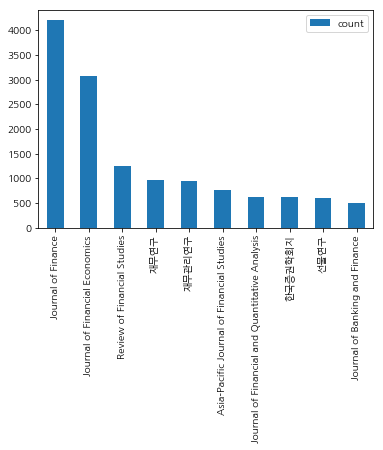

In [45]:
testing_df.sort_values(by='count',ascending=False).iloc[1:].head(10).plot.bar()

- 최소한 10년치의 데이터는 있어야 한다.
- 2017,2018 년 데이터는 무조건 있어야 한다.